# Etude Géographique : Répartition des Communes

## 1 : Importation des modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.spatial as sp


### 2 : Récupération des données
Ces données sont issues des bases de données nationales géographiques Françaises. Nous avons visualisé et trier ces données avec le logiciel ArcGIS pour écarter les communes d'outre-mer et obtenir les informations de surface de chaque communes. La méthode utilisée pour obtenir le localisation des communes est basée sur le barycentre des points la délimitant. Voici, ci-dessous la base de données récoltée. Les coordonnées de communes sont stockées dans XL93, YL93 ce qui correspond aux projections Lambert93 des données géographiques.

In [26]:
villes = pd.read_csv("communes.csv")
print(villes)

FileNotFoundError: [Errno 2] No such file or directory: 'communes.csv'

### 3 : Analyse du dataset et hypothèses de répartition

In [ ]:
villes.head()

In [ ]:
villes.shape

On a donc 34476 Communes et 15 informations par communes

In [ ]:
villes.describe()

In [3]:
plt.figure(0, figsize=(15,15))
plt.scatter(villes["XL93"], villes["YL93"], s=5, c=np.log10(villes["POPULATION"]))
plt.gca().set_aspect("equal")

NameError: name 'villes' is not defined

<Figure size 1080x1080 with 0 Axes>

L'affichage des positions avec une échelle de couleur pour la population montre que les communes ne sont pas réparties de manière aléatoire dans la France. De même que pour la population, on observes des communes fortement peuplées, qui sont les grandes villes de France avec des amas de densité et de population autour de celles-ci. Nous avons choisis de mettre une échelle logarithmique sur la population car l'échelle de couleur etait trop monotone.

In [4]:
plt.figure(0, figsize=(15,15))
plt.scatter(villes["XL93"], villes["YL93"], s=2*(villes["POPULATION"]/villes["POPULATION"].mean()), c='red')
plt.gca().set_aspect("equal")

NameError: name 'villes' is not defined

<Figure size 1080x1080 with 0 Axes>

Une autre manière de représenter la population est de mettre cette dernière comme valeur de taille de point sur la carte. Cette visualisation permet de mettre en exergue les regroupement autour des fleuves de France. et de montrer les zones de très faibles densité qui correspondent aux forêts, montagnes, ...

In [5]:
villes["POPULATION"].hist(bins=100)

NameError: name 'villes' is not defined

On voit très nettement que l'histogramme de la répartition de la population n'est pas du tout homogène mais  suit plutot une lois exponentielle de type 10% du térritoire est occupé par 90% de la population et 90% du territoire est occupé par 10% de la population.

In [6]:
pop = villes[["POPULATION", "XL93", "YL93"]] # On extrait les informations de population et localisation
grand = pop[pop["POPULATION"]>4000].index
grandes_villes = pop.iloc[grand, :]
print(grandes_villes) # On filtre les villes de plus de 40 000 habitants

NameError: name 'villes' is not defined

In [7]:
grandes_villes = pop.iloc[grand, :]

NameError: name 'pop' is not defined

In [8]:
plt.figure(1, figsize=(15,15))
plt.scatter(grandes_villes["XL93"], grandes_villes["YL93"], s=grandes_villes['POPULATION']/grandes_villes['POPULATION'].mean())
plt.gca().set_aspect("equal")

NameError: name 'grandes_villes' is not defined

<Figure size 1080x1080 with 0 Axes>

Voici une visualisation des villes comportant plus de 40 000 habitants.

### 5 : Etude de la population du Loiret

In [9]:
loiret = villes[(villes.INSEE_COM>=45000) & (villes.INSEE_COM<46000)] # Filtrage par code départementaux

NameError: name 'villes' is not defined

In [10]:
plt.figure(1, figsize=(15,15))
plt.scatter(villes["XL93"], villes["YL93"], c='blue')
plt.scatter(loiret["XL93"], loiret["YL93"], c='red')

plt.gca().set_aspect("equal")

NameError: name 'villes' is not defined

<Figure size 1080x1080 with 0 Axes>

In [11]:
loiret = villes[(villes.INSEE_COM>=45000) & (villes.INSEE_COM<46000)]
ratio_commune = loiret.size / villes.size
print(round(ratio_commune*100, 3), "%") # Pourcentage de la taille du Loiret en France

NameError: name 'villes' is not defined

In [12]:
ratio_pop = np.sum(loiret["POPULATION"]) / np.sum(villes["POPULATION"])
print(round(ratio_pop*100, 3), "%") # Pourcentage de la population du Loiret en France

NameError: name 'loiret' is not defined

On peut remarquer que le Loiret possède une densité de population légèrement plus faible que le reste de la France.

In [13]:
loc_villes = villes.loc[:,["XL93", "YL93"]].to_numpy() # Les donénes sont en mètres
print(loc_villes)

NameError: name 'villes' is not defined

In [14]:
dist_mtx = sp.distance.cdist(loiret[["XL93", "YL93"]], loiret[["XL93", "YL93"]])
dist_mtx_line = sp.distance.pdist(loiret[["XL93", "YL93"]])

NameError: name 'loiret' is not defined

La fonction ```scipy.distance.cdist()``` permet de calculer les inter-distance entre toutes villes du Loiret. Le résultat est données sous la forme d'une matrice carrée dont chaque case de la ligne i,j correspond à la distance en mètres entre la ville i et la ville j. Cette matric est donc composée de 0 dans la diagonale.

In [15]:
# La forme non symétrique de cette courbe est due à la forme non circulaire de la région
loiret_xy = loiret[["XL93", "YL93"]]
dist_mtx = dist_mtx/1000

NameError: name 'loiret' is not defined

In [16]:
dist_mtx[dist_mtx==0.0]=np.nan # Méthode pour remplacer la diagonale de 0 par des NaN
mins = np.nanmin(dist_mtx, axis=0) # Il faut utiliser np.nanmin() pour ignorer les NaN
print("nombre de villes", len(mins))


NameError: name 'dist_mtx' is not defined

### 6 : Calcul du coefficient de distribution
Ce coefficient permet de donner une valeur à la distribution dans l'espace. Un coefficient faible montre une répartition en clusters, un coefficient égal à un montre une répartition aléatoire et un coefficient > 1 jusqu'à 2,6 montre une répartition héxagonale très organisée.

In [17]:
#Re
density = len(mins)/np.sum(loiret["SURFACE"]) # densitée en /km²
print("densité des villes", round(density, 3), "/km²")
Re = 1/(2*np.sqrt(density)) # distance moyenne dans une répartition aléatoire
print("distance répartition aléatoire", round(Re, 3), "km")

NameError: name 'mins' is not defined

In [18]:
# mins sont les distances aux plus proches voisins
Ro = np.mean(mins) # distance moyenne au plus proche voisin
print("distance moyenne plus proche voisins", round(Ro,3), "km")
coef_distrib = Ro/Re
print("coef distrib", round(coef_distrib, 3))

NameError: name 'mins' is not defined

Cette valeur indique que la répartition des barycentres des communes sont légèrement ordonnées. Les communes ayant rarement des formes concaves (sauf pour Orléans :) ) les barycentres sont répartis de manière assez régulières. Le calcul des barycentre peut peut-être jouer un rôle dans ce résultat.

In [19]:
def DNN(df_in, XY_cols=["XL93", "YL93"], surf_col="SURFACE", ref_surf=None):
    #Be sure to check that all units are the same
    import pandas as pd
    import numpy as np
    import scipy.spatial as sp
    
    # Get Ro
    pts = df_in.loc[:,XY_cols].to_numpy() # extraction des X et Y et transtypage en numpy.array()
    dis_mtx = sp.distance.cdist(pts, pts) # Calcul de la matrice de distance en m
    dist_mtx[dist_mtx==0.0]=np.nan # conversion des 0.0 en NaN
    mins = np.nanmin(dist_mtx, axis=0) # Récupération de la distance minimale
    Ro = np.mean(mins) # Moyennage sur toutes les distances
    
    #Get Re : Sélection entre la densité calculé et une densité imposée en paramètre
    if ref_surf != None:
        density=len(pts)/ref_surf
    else:
        density = len(pts)/np.sum(df_in[surf_col])
    Re = 1 / (2*np.sqrt(density))
    
    return Ro/Re

# Filtre à intervalle sur la valeur POPULATION, variables (données DataFrame(), borne inférieure Int(), borne supérieure Int)
def filter_by_pop(df, b_inf=None, b_sup=None):
    if b_inf != None and b_sup == None:
        return villes[villes.POPULATION>=b_inf]
    if b_inf == None and b_sup != None:
        return villes[villes.POPULATION<=b_sup]
    if b_inf != None and b_sup != None:
        return villes[(villes.POPULATION<=b_sup) & (villes.POPULATION>=b_inf)]

On défini une fonction permettant de calculer la DNN (Distance Nearest Neighboors) pour une série de valeurs donnée.

In [20]:
borne_inf = [10**i for i in range(6)] # tracé logarithmique
print("population supérieure à", interval)
dnn_mtx = [DNN(filter_by_pop(villes, b_inf=ele)) for ele in borne_inf]
print(dnn_mtx)

plt.plot(borne_inf, dnn_mtx)
plt.xscale('log')

NameError: name 'interval' is not defined

On vois que la répartition n'est pas homogène en fonction du nombre d'habitant dans la ville. Les villes faiblements peuplées ont une répartition assez ordonnées tandis que les villes de forte population sont plus aléatoires.

### 7 : Fonction de Ripley

In [21]:
def Ripley(df_in, XY_cols=["XL93", "YL93"], surf_col="SURFACE", ref_surf=None, stab=10):
    print("begin")
    # Format input datas
    pts = df_in.loc[:,XY_cols].to_numpy()
    dist_mtx = sp.distance.cdist(pts, pts)
    dist_mtx[dist_mtx==0.0]=np.nan # dist in meter
    dist_mtx = dist_mtx/1000 # distance in km
    r_max = np.nanmax(dist_mtx)/2 # le rayon de recherche de voisins ne doit pas excéder la distance maximale calculée divisée par 4
    
    #Get density
    if ref_surf != None:
        density=len(pts)/ref_surf
    else:
        density = len(pts)/np.sum(df_in[surf_col])
        
    #increment for r
    # L'utilisation de la densité comme indicateur d'incrément permet de rendre l'échentillonnage indépendant de r_max
    # une densité de 2 /km² donne une distance moyenne de 250 m entre les villes ce qui donne un bon indicateur d'incrément sachant qu'on souhaite, idéalement ajouter une ville par incrément
    sample_inc = int(np.sqrt(1/density))
    
    
    n = dist_mtx.shape[0] # le nombre de villes à considérer
    r_values = np.arange(1,r_max,sample_inc) # cré une liste de 10 sous valeur entieres de r_max
    
    print("dist_mtx calculated for")
    print("r_max", round(r_max), 'km')
    print("incrément", sample_inc, 'km')
    print("numbre de villes : ", n)
    print()
    
    N_i_r = []
    new_r = []
    stability_crit = stab # indicateur de stabilité (si la valeur n'évolue plus pendant 10 tours, on arrête la mesure pour ce r_max)
    
    for r in r_values:
        N_i_r.append(np.sum(np.sum(dist_mtx<=r, axis=0))/2) #Somme des nombres de villes dans r
        new_r.append(r)
        
        #stability criterion is defined to stop incrementing r whenever stability is reached
        if len(N_i_r) > stability_crit:
            if np.mean(N_i_r[-stability_crit:]) == N_i_r[-1]:
                print("-- broke incrementation because")
                print("stability is reached at", r, "km")
                break
    
    N_i_r = np.array(N_i_r)
    K_out_norm = np.sqrt((N_i_r / (n*density))) 
        
    
    return new_r, K_out_norm

In [22]:
r_values, K_r = Ripley(loiret)

NameError: name 'loiret' is not defined

In [23]:
plt.scatter(r_values, K_r)
plt.xlabel('r (km)')
plt.ylabel("Ripley value")

NameError: name 'r_values' is not defined

In [24]:
pop = [10**i for i in range(6)]
K_pop = []
for ele in pop:
    print("villes avec moins de ", ele, "habitants")
    filt_df = filter_by_pop(villes, b_sup=ele)
    r_values, K_r = Ripley(filt_df)
    K_pop.append(K_r)
    

villes avec moins de  1 habitants


NameError: name 'villes' is not defined

ValueError: x and y must have same first dimension, but have shapes (6,) and (0,)

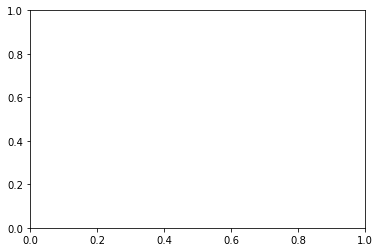

In [25]:
plt.plot(pop, K_pop)